# import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os

from bloatedHJs import read_planet_data 
from bloatedHJs import SinglePlanetModel
from bloatedHJs import corner_plot
from bloatedHJs import inference

In [2]:
# configure matplotlib for better visualisations
from matplotlib import rcParams as rc

rc['xtick.top'] = True
rc['xtick.major.size']     = 6
rc['xtick.minor.size']     = 3

rc['xtick.direction']      = 'in'
rc['xtick.minor.visible']  = True 
rc['xtick.minor.top']      = True 
rc['xtick.minor.bottom']   = True 

rc['ytick.right']          = True
rc['ytick.major.size']     = 6
rc['ytick.minor.size']     = 3

rc['ytick.direction']      = 'in'
rc['ytick.minor.visible']  = True
rc['ytick.major.right']    = True
rc['ytick.minor.right']    = True

rc['font.size']            = 16
rc['xtick.major.pad']      = 8.0
rc['xtick.minor.pad']      = 8.0

In [3]:
np.random.seed(1234)

# Load planet data

In [4]:
fp = 'data/sys_HD_209458'
data = read_planet_data(fp)
data = data.iloc[0]

In [5]:
sys = fp.split('sys_')[1]
if not os.path.exists(sys):
    os.mkdir(sys)

In [6]:
data

System               HD_209458
Mp                       0.714
Mperr                    0.017
Rp                        1.38
Rperr                    0.017
Mstar                    1.148
Mstarerr                  0.04
Teq                    1457.31
sma                    0.04747
Tstar                     6117
Tstarerr                    50
Rstar                    1.162
Rstarerr                 0.014
Mstar_completo         1.14427
Mstarerr_completo    0.0117492
Name: 0, dtype: object

# Posterior Analysis

In this section, we will study the effect of choosing different priors on the inferred internal lmuinosity `Lumi` of the planet (this is the main parameter of interest).
To do this, we will assume `Lumi` follows two different distributions:

1- uniform distribution in linear space

2- uniform distribution in log space

For more details why we chose these priors, check the paper ;) 

This can be easily done by running MCMC twice and setting `lumi_linear=True` and `lumi_linear=False`, respectively.

## Lumi ~ linear uniform distribution

In [7]:
# MCMC was already ran in single_planet_demo notebook
# we're just loading the samples in this notebook
samples_posterior_linear = pd.read_csv('HD_209458/HD_209458_lumilinear_posterior_chains.csv', index_col=0)

## Lumi ~ log uniform

In [8]:
sp_post_log = SinglePlanetModel(data, lumi_linear=False, progress=False)
samples_posterior_log = sp_post_log.run_mcmc()

~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
           HD_209458_lumilog_posterior
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

Running MCMC -- 50 walkers -- 500 nburn -- 500 nsteps ... 

Running burn-in ...
Acceptance ratio in the burn-in stage ... 0.5417

Running production chain...
Acceptance ratio 0.5092
MCMC DONE !
Saving samples ... DONE !


## Compare the posterior distributions

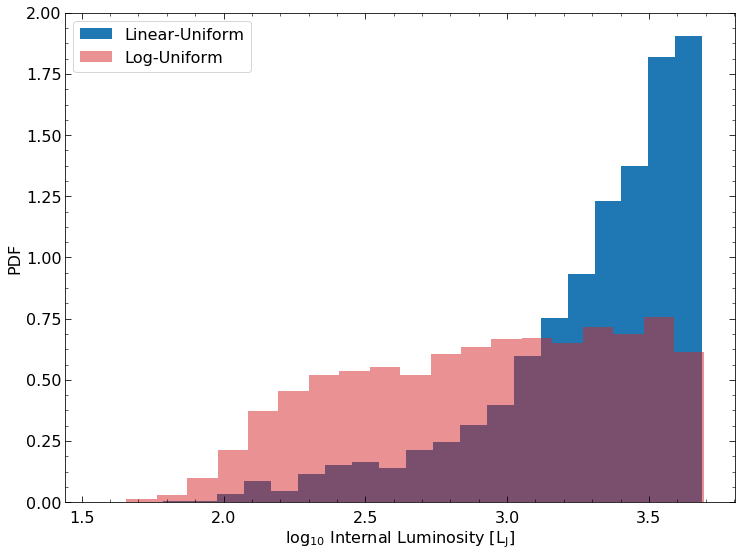

In [9]:
plt.figure(figsize=(12,9))
plt.hist(np.log10(samples_posterior_linear['Lumi']), 20, \
         color='C0', label='Linear-Uniform', density=True)
plt.hist(samples_posterior_log['Lumi'], 20, \
         color='C3', label='Log-Uniform', density=True, alpha=0.5)
plt.legend()
plt.xlabel(r'log$_{10}$ Internal Luminosity [L$_{\rm J}$]')
plt.ylabel('PDF');

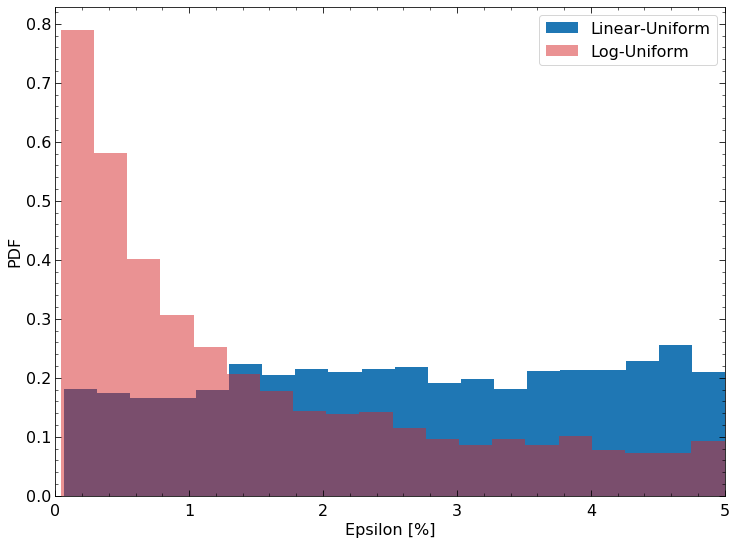

In [10]:
plt.figure(figsize=(12,9))
plt.hist(samples_posterior_linear['Epsilon'], 20, \
         color='C0', label='Linear-Uniform', density=True)
plt.hist(samples_posterior_log['Epsilon'], 20, \
         color='C3', label='Log-Uniform', density=True, alpha=0.5)
plt.legend()
plt.xlabel(r'Epsilon [%]')
plt.ylabel('PDF')
plt.xlim(0, 5);

As we showed in Sarkis+2020 the results of the lower level of the hierarchical model are prior dependent. But we can correct for this to study the distribution at the population level! 

We will apply the methodology developed in Sarkis+2020 (see Section 4.2 of the paper) to study the distribution of the internal luminosity and Epsilon of the population.